# TP 2 - Perceptron


**Les exercices du TP 2 portent sur :**
- Régression linéaire
- Régression polynomale
- Régression logistique

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

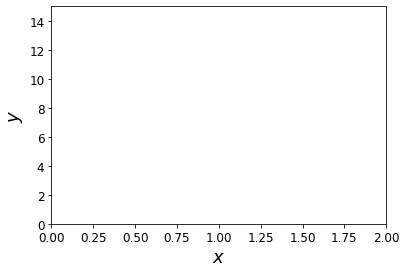

In [1]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Perceptrons

**Note**: nous définissons explicitement `max_iter` et `tol` pour éviter les avertissements sur le fait que leur valeur par défaut va changer dans les futures versions de Scikit-Learn.

# Exercice 1 : Perceptrons avec Iris

Dans cet exercice, Utilisons le jeu de données Iris : c’est un jeu de données très connu qui comporte la longueur et la largeur des sépales et des pétales de 150 fleurs d’iris de trois espèces différentes : Iris setosa, Iris versicolor et Iris virginica.

![](https://cdn-ak.f.st-hatena.com/images/fotolife/f/fukuit/20160903/20160903124534.png)

Scikit-Learn fournit une classe Perceptron qui implémente un réseau de LTU. Nous pouvons l’employer très facilement, par exemple sur le jeu de données Iris. Le code ci-dessous construit un modèle pour savoir à quelle classe appartient une fleur.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

**Question 1.1 :** Utiliser la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) pour prédire à quelle classe appartient une fleur de longueur des sépales de **2** et de largeur des sépales de **0.5**

In [3]:
print('reponse')

reponse


**Question 1.2 :** Le résultat de l'apprentissage peut également être représenté sous forme graphique. A l'aide du graphique ci-dessous, dire à quelle classe appartient une fleur de longueur des sépales de 2 et de largeur des sépales de 1.25. Tracer les traits sur le schéma.

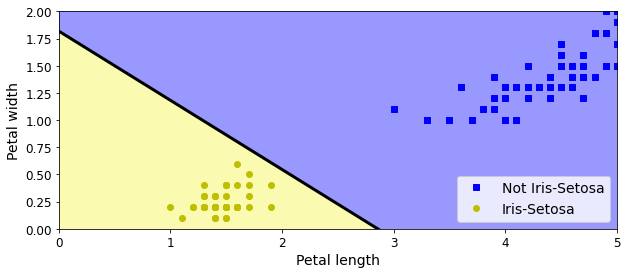

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [5]:
print('Une fleur de longueur des sepales de 2 et de largeur des sepales de 1.25 appartient à la classe X')

Une fleur de longueur des sepales de 2 et de largeur des sepales de 1.25 appartient à la classe X


## Exercice 2 : Fonctions d'activation

On donne une série de fonction d'activation des neuronnes. L'objectif est d'afficher des graphiques avec leurs valeurs.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

**Question 2.1 :** Afficher les 4 fonctions avec l'entrée du neurone en abscisse et la sortie du neurone en ordonnée. 

(-5.0, 5.0, -1.2, 1.2)

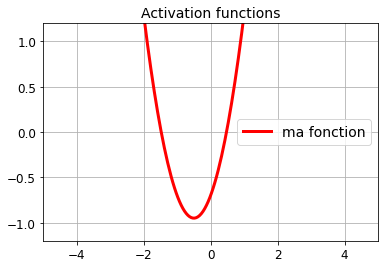

In [7]:
def uneFonction(x):
    return x*x+x-0.7
z = np.linspace(-5, 5, 200)
plt.plot(z, uneFonction(z), "r-", linewidth=3, label="ma fonction")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

**Question 2.2 :** Afficher les 4 fonctions avec :
- abscisse = une valeur de -0.2 à 1.2 (*$x_1$*)
- ordonnée = une valeur de -0.2 à 1.2 (*$x_2$*)
- sur la grille : le résultat de la fonction d'activation appliquée à  *$x_1$* et *$x_2$*

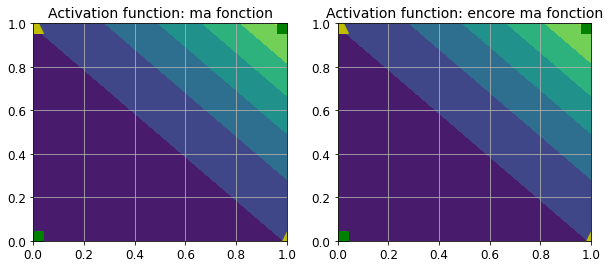

In [8]:
x1s = np.linspace(0, 1, 100)
x2s = np.linspace(0, 1, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=uneFonction)
z2 = mlp_xor(x1, x2, activation=uneFonction)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: ma fonction", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: encore ma fonction", fontsize=14)
plt.grid(True)

## Exercice 2 : Perceptron multi couche

L'objectif est de reconnaitre une lettre manuscrite après avoir entraîner une série d'images de lettres à l'aide d'un perceptron multicouche. Pour cela, on va utiliser la bibliothèque **TensorFlow** :

In [9]:
import tensorflow as tf

La base de données est bien connue. Il s'agit de [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Il s’agit d’un jeu de données contenant 70 000 images de chiffres manuscrits, de 28×28 pixels et en dégradé de gris. 
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Séparons-le en un jeu de données dédié à l’entraînement du réseau de neurones, et un jeu de données dédié au  test.

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [48]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [49]:
y.shape

(70000,)

In [50]:
28 * 28

784

In [51]:
28 * 28

784

In [58]:
toto=np.array(X)

In [59]:
np.savetxt('X.csv', toto, delimiter=',', fmt='%d')

In [64]:
tutu=np.array(y.astype(np.int32))
tutu.astype(np.int32)

array([5, 0, 4, ..., 4, 5, 6], dtype=int32)

In [65]:
np.savetxt('y.csv', tutu, delimiter=',', fmt='%d')

In [66]:
arraa=np.loadtxt('X.csv', delimiter=',')
Xaa=arraa

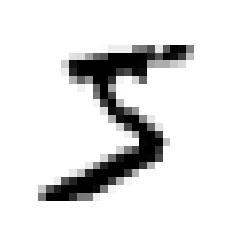

In [67]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = Xaa[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = toto[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [16]:
y[0]

'5'

In [17]:
y = y.astype(np.uint8)

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28,28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28,28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [19]:
X_test[3].shape

(28, 28)

**Question 3.1 :** Combien y a-t-il de données d'entraînement et de validation ? Fournir également les chiffres en terme de pourcentage.

In [20]:
entrain=0;
valid=0
perc1=0
perc2=0
print(f'donnees entrainement ={entrain} soit {perc1}%')
print(f'donnees validation ={valid} soit {perc2}')

donnees entrainement =0 soit 0%
donnees validation =0 soit 0


La matrice X_train (un tableau NumPy à deux dimensions) comporte 55 000 lignes et 784 colonnes (28×28=784). Chaque ligne représente une image, et chaque colonne représente l’intensité lumineuse d’un pixel de l’image (de 0,0 pour le blanc à 1,0 pour le noir). y_train est un tableau à une seule dimension contenant 55 000 entiers, un par image, chacun indiquant quel chiffre est représenté par l’image correspondante. Par exemple si la 5ème image de X_train représente un 9, alors le 5ème entier de y_train est égal à 9. La matrice X_test et le vecteur y_test sont similaires mais ne contiennent que 10 000 instances (nous n’utiliserons pas ici les 5 000 dernières instances disponibles dans mnist.validation).

Construisons maintenant un réseau de neurones profond avec deux couches cachées (l’une avec 300 neurones, l’autre avec 100) et une couche de sortie softmax avec 10 neurones.

**Question 3.2 :** Le code ci-dessous correspond à l'entraînement du réseau de neurones.
Après l'avoir exécuter, répondre au questions suivantes :
- Quel est le temps d'exécution total ?
- Quel est l'erreur du modèle avant l'entraînement et après l'entrainement ?

Bien attendre que l'entrainement soit fini !

In [21]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20)

print("===========================")
print("FINI !")

Train on 55000 samples
Epoch 1/20
55000/55000 [==============================] - 7s 132us/sample - loss: 0.5874 - accuracy: 0.8458
Epoch 2/20
55000/55000 [==============================] - 7s 123us/sample - loss: 0.2891 - accuracy: 0.9165
Epoch 3/20
55000/55000 [==============================] - 7s 119us/sample - loss: 0.2391 - accuracy: 0.9329
Epoch 4/20
55000/55000 [==============================] - 7s 123us/sample - loss: 0.2051 - accuracy: 0.9415
Epoch 5/20
55000/55000 [==============================] - 7s 122us/sample - loss: 0.1785 - accuracy: 0.9488
Epoch 6/20
55000/55000 [==============================] - 7s 122us/sample - loss: 0.1578 - accuracy: 0.9550
Epoch 7/20
55000/55000 [==============================] - 7s 119us/sample - loss: 0.1408 - accuracy: 0.9598
Epoch 8/20
55000/55000 [==============================] - 7s 120us/sample - loss: 0.1271 - accuracy: 0.9634
Epoch 9/20
55000/55000 [==============================] - 7s 120us/sample - loss: 0.1155 - accuracy: 0.9671
Epoch

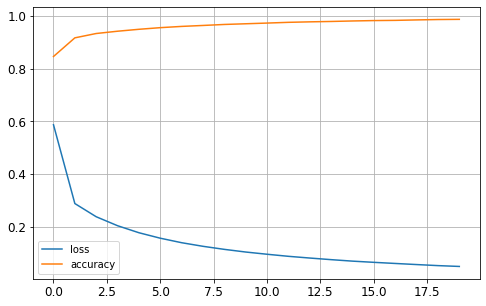

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Le résultat ci-dessous permet de tester les données de validation :

In [23]:
model.evaluate(X_valid, y_valid)


5000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07833005755878986, 0.9772]

**Question 3.3 :** Compléter le tableau ci-dessous en testant plusieurs architectures différentes :

| Nb neurones couche 1 | Nb neurones  couche 2 | Nb neurones  sortie | Précision | Perte | Temps |
| :------------------: | :-------------------: | :-----------------: | :-------: | :---: | :---: |
|          0           |           0           |          0          |     0     |   0    |   0   |
|          0           |           0           |          0          |     0     |   0    |   0   |
|          0           |           0           |          0          |     0     |   0    |   0   |
|          0           |           0           |          0          |     0     |   0    |   0   |

**Question 3.4 :** Refaire l'apprentissage avec les valeurs optimales. **Ecrire des lettres sur une feuille de papier les prendre en photo et vérifier que la lettre est bien reconnue.**

Lecture et Affichage de votre image :

In [24]:
from PIL import Image
## Mettre le nom de votre photo
img = Image.open("un.jpg")
#img = Image.open("chiffre.jpg")
## Changer la taille de l'image
basewidth = 28
img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
## Affiche l'image redimmensionnée
print("image couleur :")
display(img)
## Converti l'image en niveau de gris
img=img.convert('L')
print("image niveau de gris :")

display(img)
## Converti en tableau
arr = 255-np.fromiter(iter(img.getdata()), np.uint32)
arr.resize(img.height, img.width)
arr=np.reshape(arr,(1,28,28))
#print("image en tableau :")
#display(arr)
arr.shape

image couleur :


image niveau de gris :


(1, 28, 28)

Le code ci-dessous prédit les valeurs sur l'exemple visualisé plus tôt (Cf code précédent)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
5


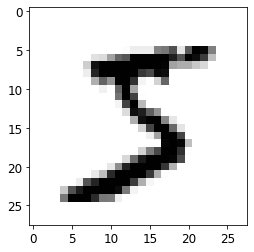

In [25]:
array=np.reshape(X[0],(1,28,28))# Exemple visualisé plus tôt
some_digit = np.reshape(array,(28,28))
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
y_pred_iter = model.predict_classes(array)
y_proba = model.predict(arr)
print(y_proba.round(2))# Liste des proba par classe 
y_pred = list(y_pred_iter)
print(y_pred[0]) # Classe reconnue

**Question 3.4 :** Trouver à quelle classe appartient votre photo. Expliquer le résultat.

In [26]:
'réponse avec du code'

'réponse avec du code'

réponse avec du texte